In [1]:
from matplotlib import pyplot as plt, image as mpimg 
import cv2
import numpy as np 
import pandas as pd 
import os
import random
import math 

In [4]:
tab_functions = [reverseColor, removeWhite, smoothImage, noise, rota, sliceImg, erosion, emaciated, edgeDetection]

In [16]:
# TODO : Find some forbidden operations between functions ... others ways to improve ? 
path = os.getcwd()+"\\training set\\"
parent_directory = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
nbFunctions = 11
print( str( math.factorial(nbFunctions)/( 2*math.factorial(nbFunctions-2) ) ) )
count=-1
for root, dirs, files in os.walk(path):
    # print(os.getcwd()+"\\new\\"+str(count))
    count+=1
    pathDir = os.getcwd()+"\\new"+str(count)
    os.makedirs(pathDir, exist_ok=True)
    imCount=0
    for file in files:
        # each image is gonna have 2 random function applied on her
        full_path = os.path.join(root, file)
        img = mpimg.imread(full_path) # color between 0 -> noir and 255 -> white
        line, col, rgb = img.shape # 200 rows, 200 columns, RGB 
        randNb = random.randint(0,len(tab_functions)-1)
        i = tab_functions[randNb](img)
        randNb = random.randint(0,len(tab_functions)-1)
        i = tab_functions[randNb](i)
        '''
        i = reverseColor(img)
        i = removeWhite(img)
        i = smoothImage(img)
        i = noise(img)
        i = rota(img)
        i = sliceImg(img)
        i = erosion(img)
        i = emaciated(img)
        i = edgeDetection(img)
        # outlines = outlinesDots(img) # need to be improved
        # img = resize(img) # need to be improved
        '''
        thepath = os.getcwd()+"\\new"+str(count-1)+"\\"+str(imCount) # -1 required will see later why 
        cv2.imwrite(thepath+".jpg", i) 
        #print(os.getcwd()+"\\new"+str(count)+"\\"+str(imCount))
        imCount+=1

55.0


In [6]:
# Total of functions processing modification on image : 10 // 1 just giving us the outline 
def reverseColor(img) :
    modification = np.zeros_like(img) # matrix with the same size of img but full of 0
    modification = 255 - img 
    return modification
def removeWhite(img) : 
    return np.clip(img.astype(int),0,150).astype(np.uint8)
def smoothImage(img) : 
    ksize=(random.choice(range(1, 20, 2)),random.choice(range(1, 20, 2))) # between 1 and 20 odd for kernel's length for convolution 
    # more the values are high more the blur will be impacted by a larger number of pixel 
    # odd kernel guarantees that the core has a symmetrical central point
    standardDev = random.randint(0,20) # impact on the pronunciation of blur on the final matrix during convolution 
    return cv2.GaussianBlur(img,ksize,standardDev)
def noise(img) : 
    mean = random.uniform(0, 0.3) # the average of the noise that will be added 
    standardDev = random.uniform(0, 0.3)
    image = img.astype(np.float32) / 255.0 # normalisation 
    noise = np.random.normal(mean, standardDev, image.shape)
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0, 1) # just to be sure that the value stay between 0 and 1 
    return (noisy_image * 255).astype(np.uint8) # convert to 8-bit integers
def rota(img) :
    return np.rot90(img,random.randint(0,359))
def sliceImg(img) : # binarization of the image to slice the shape of our figure
    _,binary_image = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY) # return a tuple : (threshold value actually used in thresholding process, image)
    # this function return us an image with hole on our figure -> to counter that, we can apply an erosion filter
    return binary_image
def erosion(img) : 
    kernel = np.ones((random.randint(0,5),random.randint(0,5)), np.uint8)
    return cv2.erode(img,kernel,iterations=1) # Currently we will let iterations=1, we will see later if we change or not 
def emaciated(img) : 
    kernel = np.ones((random.randint(0,5),random.randint(0,5)), np.uint8)
    return cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)
def edgeDetection(img) : 
    return cv2.Canny(img,1,10) # have to understand how work Sobel algorithm for the parameter of Canny algorithm 
def outlinesDots(img) :
    outlines,_ = cv2.findContours(img,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return outlines # list of outlines dots obtained with the Canny algorithm
def resize(img) :
    new_width = 1600 
    new_height = 200 
    return cv2.resize(img,(new_width, new_height))

In [15]:
# I've created an image which is not a number in paint and I will apply to this image several combination of function
# in order to modify it
path = os.getcwd()+"\\training set\\None\\img.jpg"
noNbImg = mpimg.imread(path)

In [23]:
for l in range (len(tab_functions)-1) :
    for j in range (len(tab_functions)-1) :
        i = tab_functions[l](noNbImg)
        i = tab_functions[j](i)
        thepath = os.getcwd()+"\\newNone\\"+str(l)+str(j)+".jpg"
        cv2.imwrite(thepath,i)

In [14]:
# Now we will linger on the distortion aspect of an image 
# To apply distortion we need to select point but not randomly ... 
# I will explore  different algorithm that will be usefull
# the canny algoritghm 
# the Hough's transformation 
# corner sensor of Harris or Shi-Tomasi

In [ ]:
# Everything under this comment section need to be checked before going into a function 

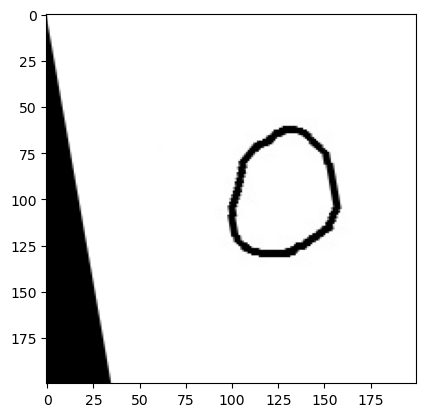

In [31]:
# opération de cisaillementshear_angle = 30  # Angle de cisaillement en degrés

shear_angle = 10  # Angle de cisaillement en degrés

# Matrice de transformation affine pour le cisaillement
matrix_shear = np.float32([[1, np.tan(np.radians(shear_angle)), 0],
                           [0, 1, 0]])

# Application de la transformation affine de cisaillement
sheared_img = cv2.warpAffine(img, matrix_shear, (img.shape[0], img.shape[1]))
plt.imshow(sheared_img)

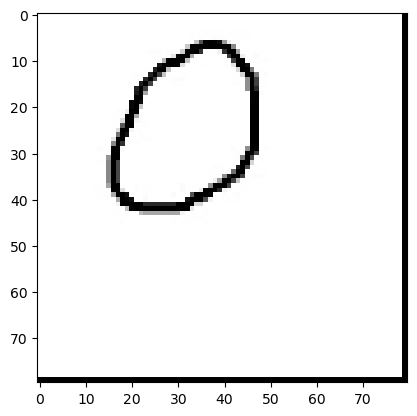

In [48]:
# Créer une grille de déformation
rows, cols = image.shape[:2]
grid_size = 80
x_points = np.linspace(50, cols, grid_size)
y_points = np.linspace(50, rows, grid_size)
x_grid, y_grid = np.meshgrid(x_points, y_points)

# Définir les points de contrôle de la grille de déformation
control_points = np.column_stack((x_grid.flatten(), y_grid.flatten()))

# Appliquer la déformation de la grille
deformed_image = cv2.remap(img, x_grid.astype(np.float32), y_grid.astype(np.float32), interpolation=cv2.INTER_LINEAR)

plt.imshow(deformed_image)